In [394]:
import pytesseract
import cv2
from matplotlib import pyplot as plt

In [395]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [396]:
image = "images/indices.png"
img = cv2.imread(image)
base_image = img.copy()

In [397]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [398]:
cv2.imwrite("temp/index_gray.png",gray_image)

True

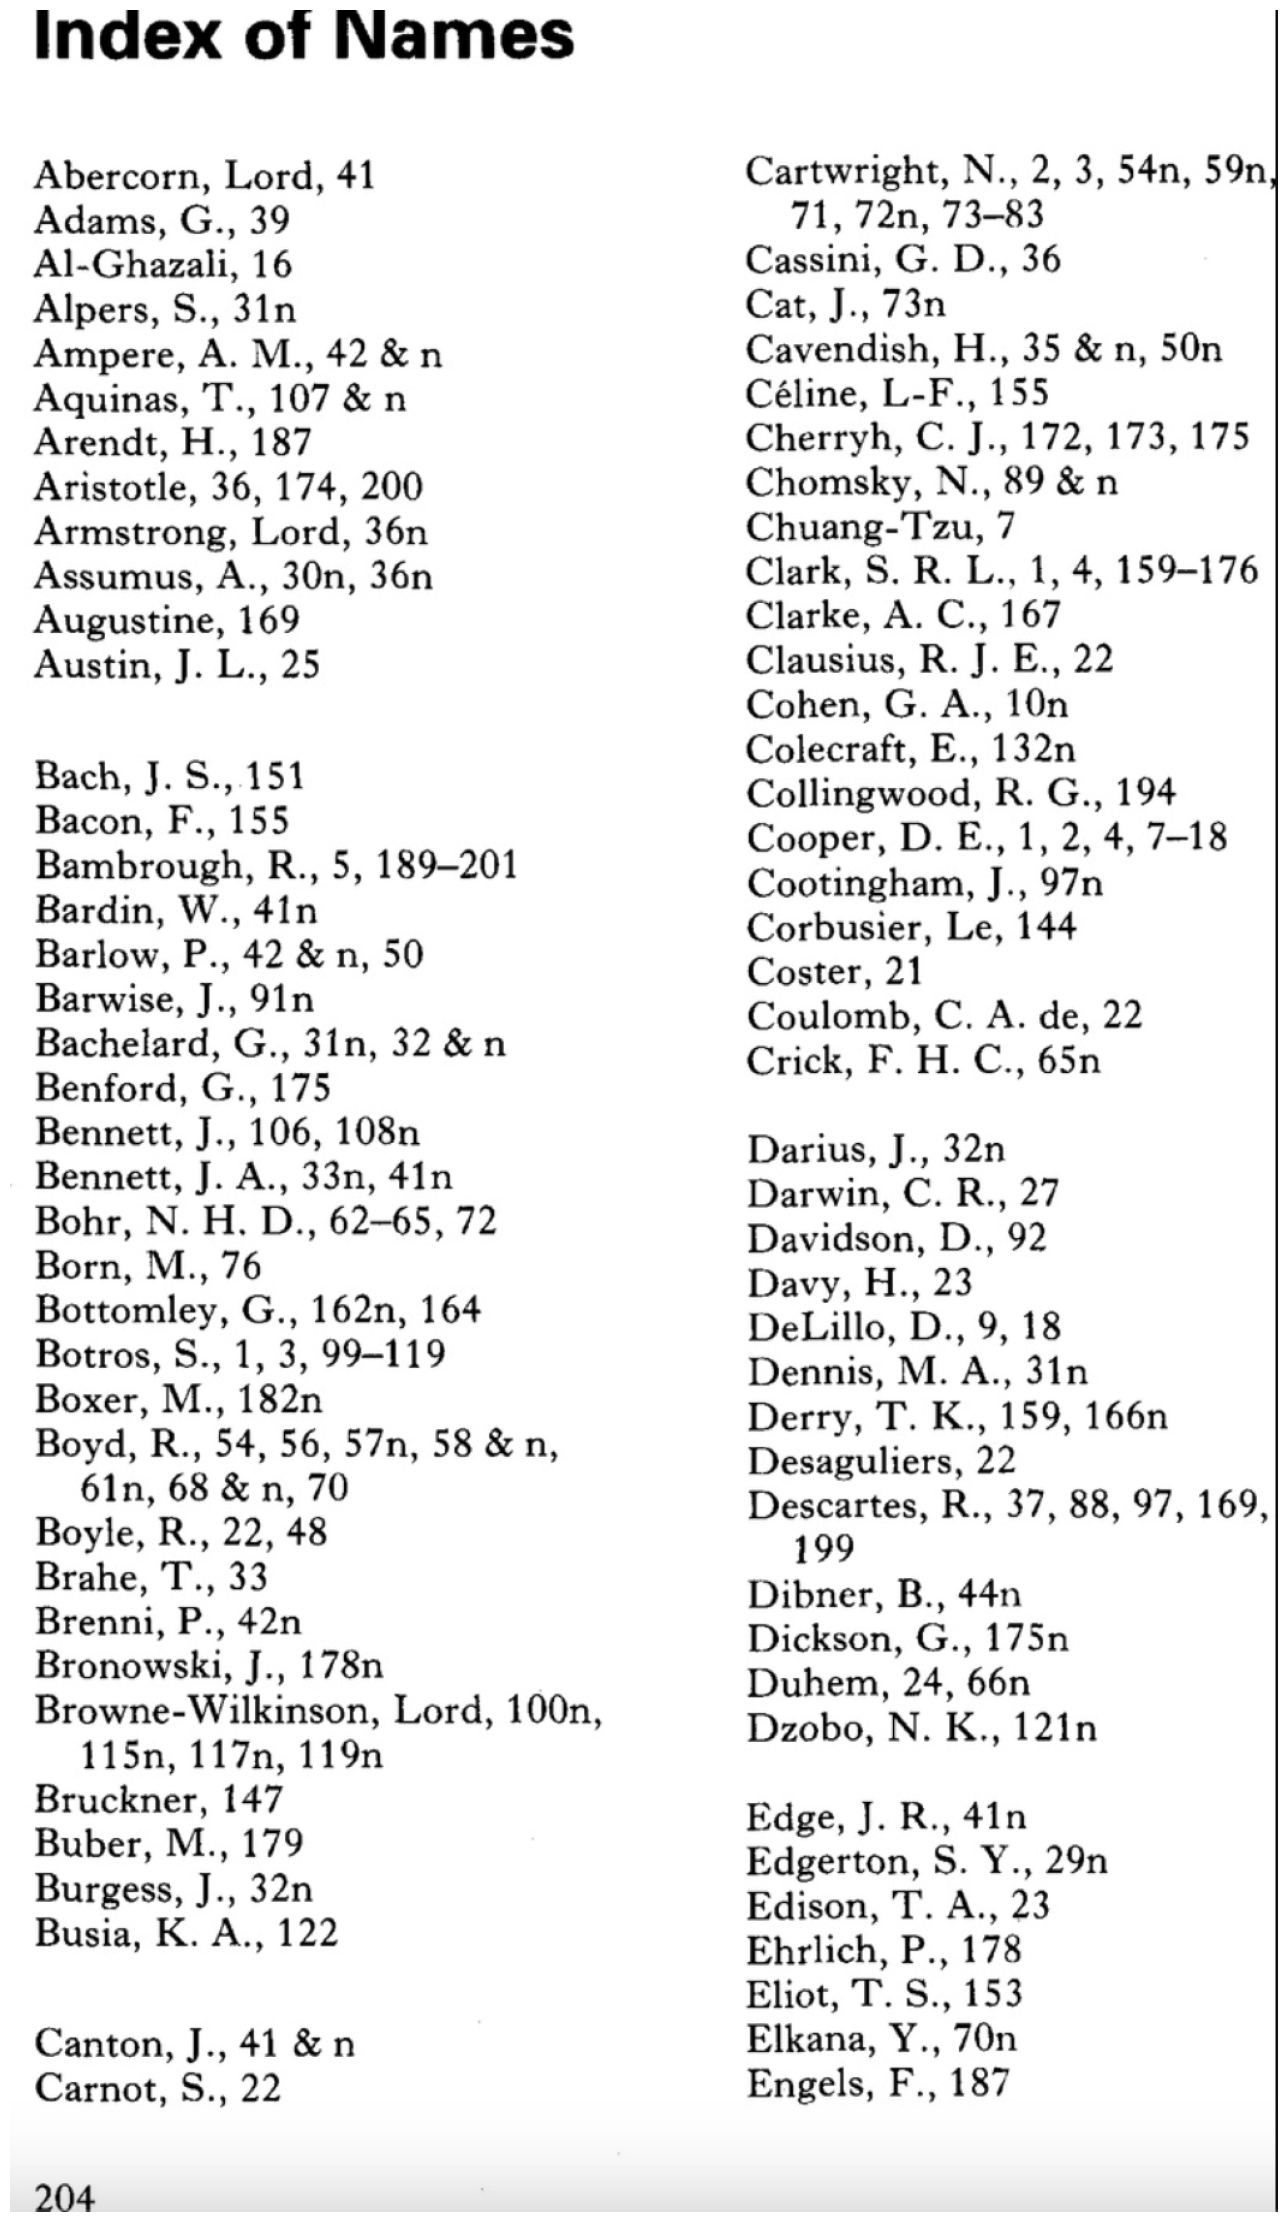

In [399]:
display("temp/index_gray.png")

In [400]:
#Let's preprocess the text a little bit more. Our objective is not to identify text rather than identify blocks of text.
blur = cv2.GaussianBlur(gray_image, (7,7),0)
cv2.imwrite("images/index_blur.png",gray_image)

True

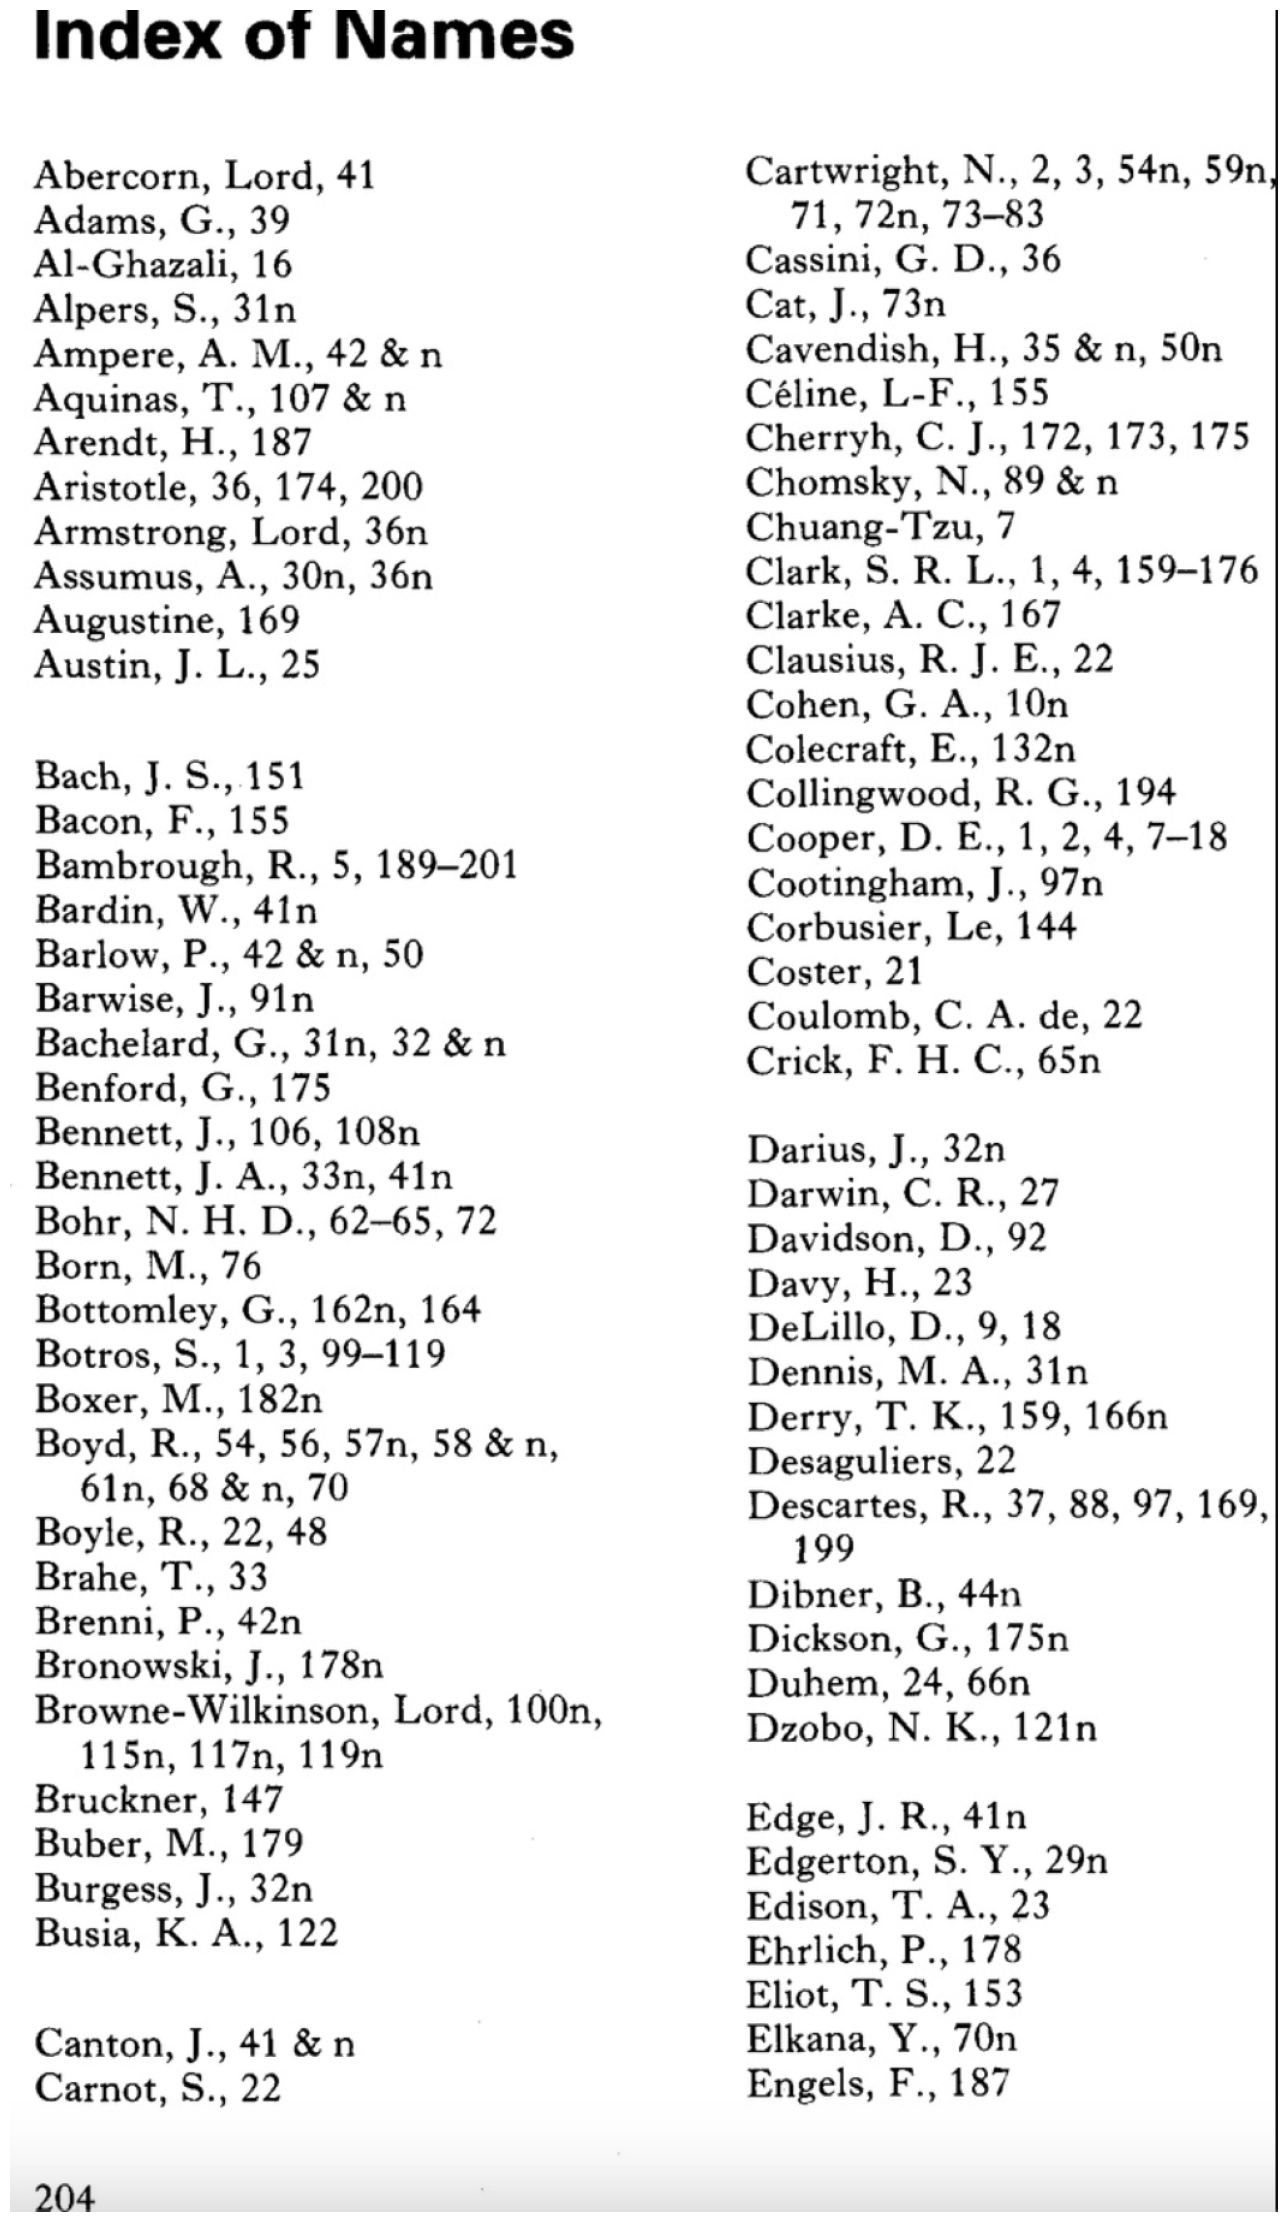

In [401]:
display("images/index_blur.png")

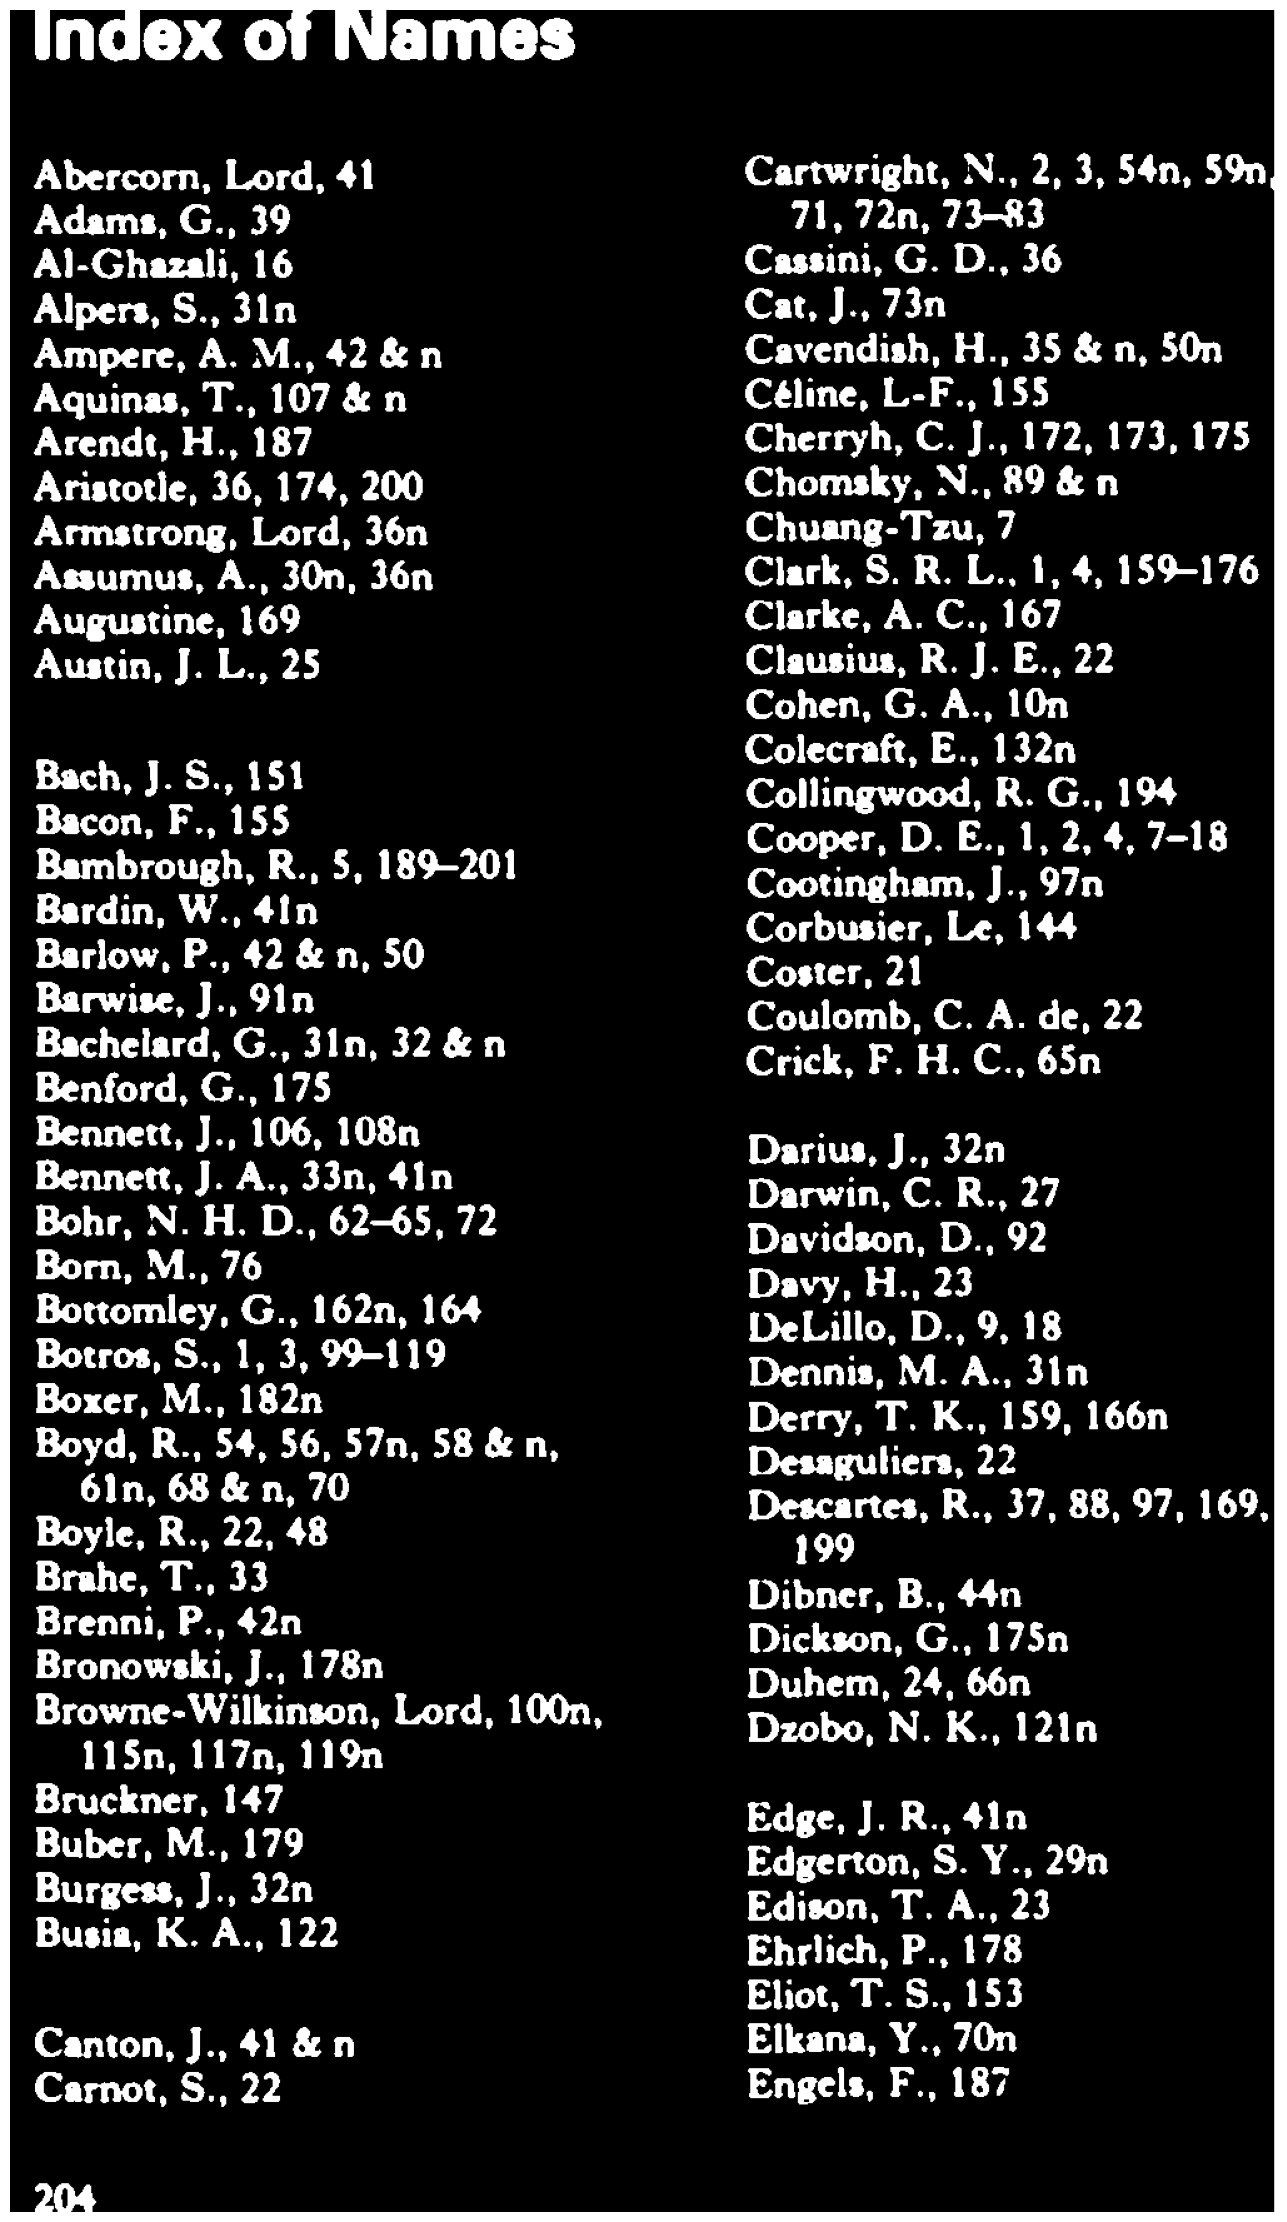

In [402]:
thresh = cv2.threshold(blur, 0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2.imwrite("images/index_tresh.png",thresh)
display("images/index_tresh.png")

In [403]:
#Now we can less and less read the text but we can see the structure better. We're gonna do one more preprocessing
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (5,15))
cv2.imwrite("images/index_kernal.png",kernal)
display("images/index_kernal.png")

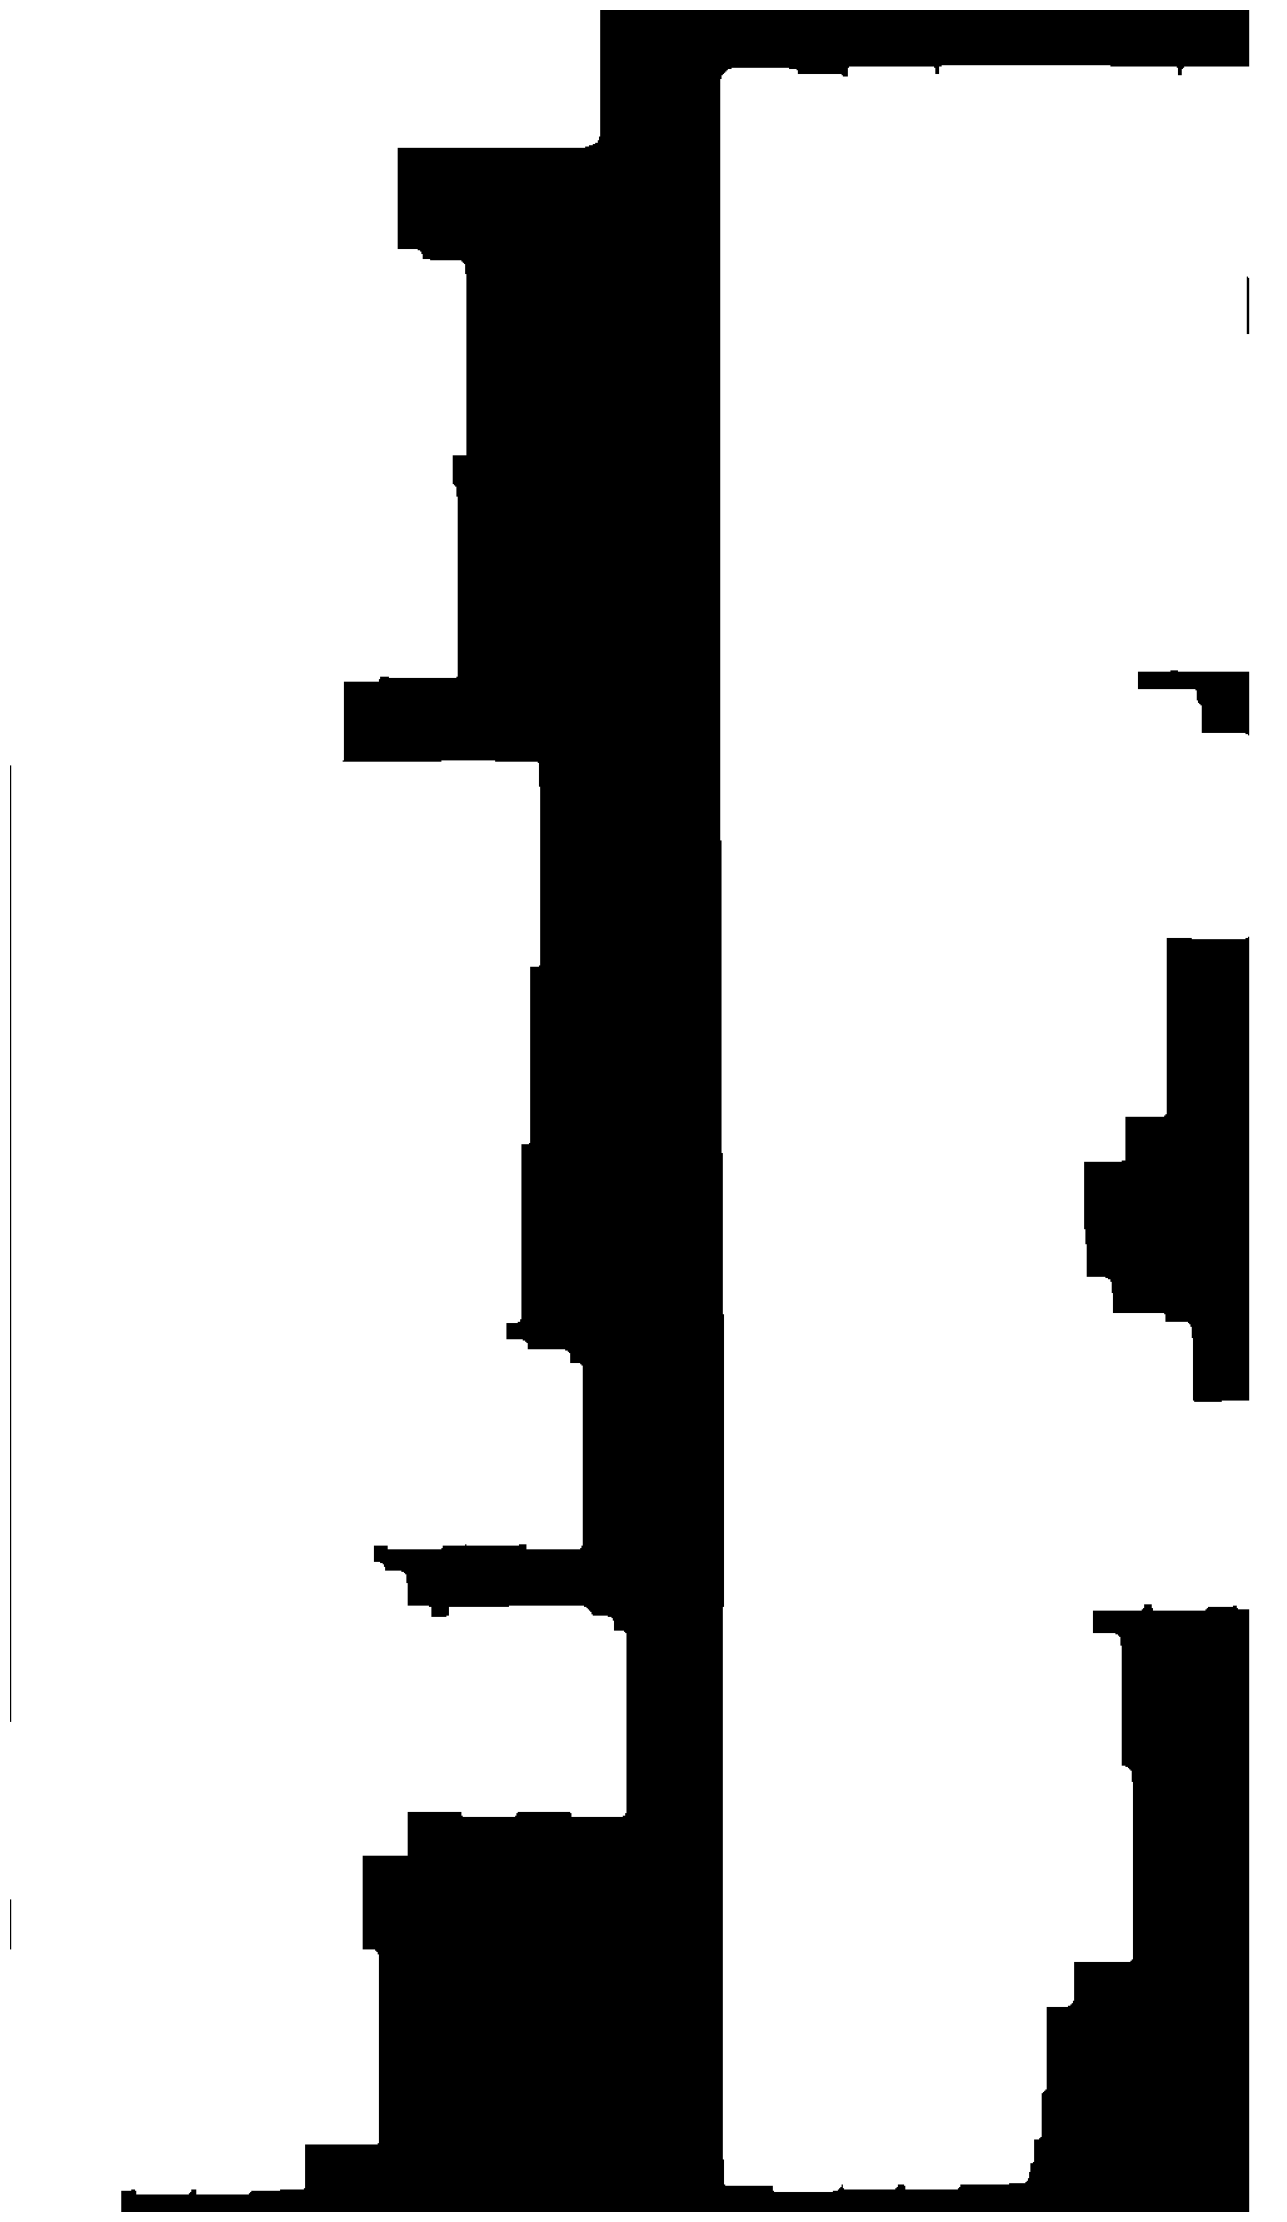

In [404]:
dilate = cv2.dilate(thresh,kernal,iterations=10)
cv2.imwrite("images/index_dilate.png",dilate)
display("images/index_dilate.png")

NOW we have an image that only shows the contours of text. And that is our next step. We're gonna look at the countours in this image, apply them to the original one and extract the text that will be in those countours as it was one independent text.

In [405]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [406]:
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [407]:
#We sort countors in order from left to right
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

In [408]:
# #We're gonna draw the boxes around the texts so we can see them. 
# for c in cnts:
#     #in every countour we take the dimensions 
#     x, y, w, h = cv2.boundingRect(c)
#     #and draw a rectangle on the images with these dimensions. The last parameter is the color which by the community is green.
#     cv2.rectangle(img, (x,y),(x+w, y+h), (36,255,12),2)
# cv2.imwrite("images/index_counturs_marcked.png",img)
# display("images/index_counturs_marcked.png")

As we can see we have a lot of countours that we don't want so... what to do? use a conditional statement that takes only the bigger ones, in this case the boxes of text

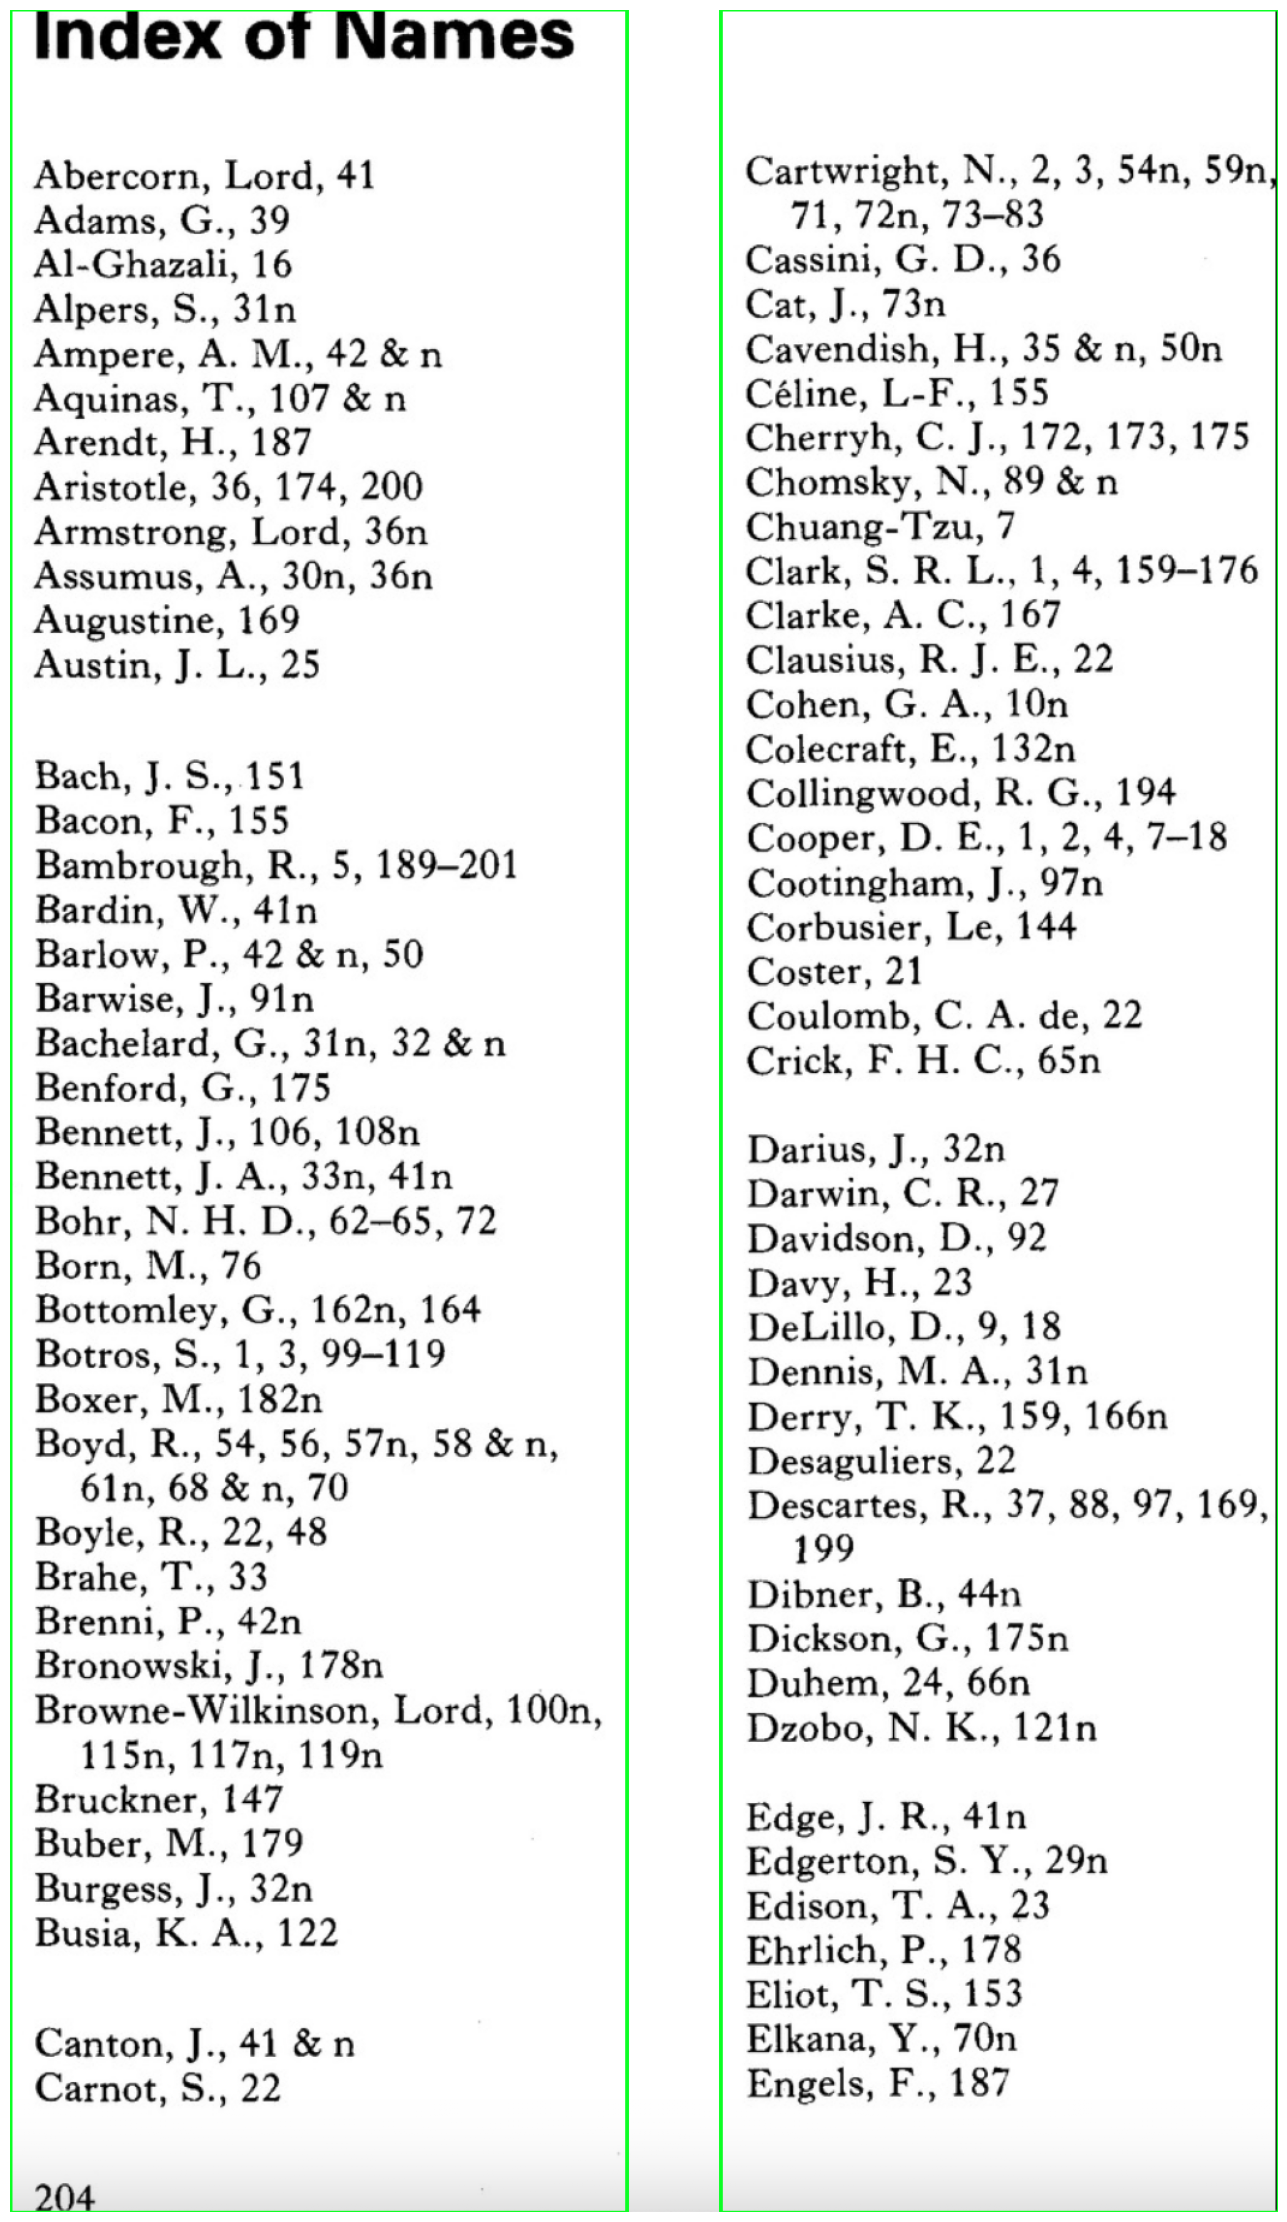

In [409]:
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    #we established a limit for the boxes so we get only the bigger ones
    if h > 400 and w > 200:
        cv2.rectangle(img, (x,y),(x+w, y+h), (36,255,12),2)
cv2.imwrite("images/index_counturs_marcked.png",img)
display("images/index_counturs_marcked.png")

So, once we've played a little with the parameters we can see that we have identified all the boxes of text in a useful way (we can do more preprocessing to adapt them better but for the purpouse of this tutorial it won't be necessary). Now we are gonna create a new image from those boxes and process it. This is called a roi

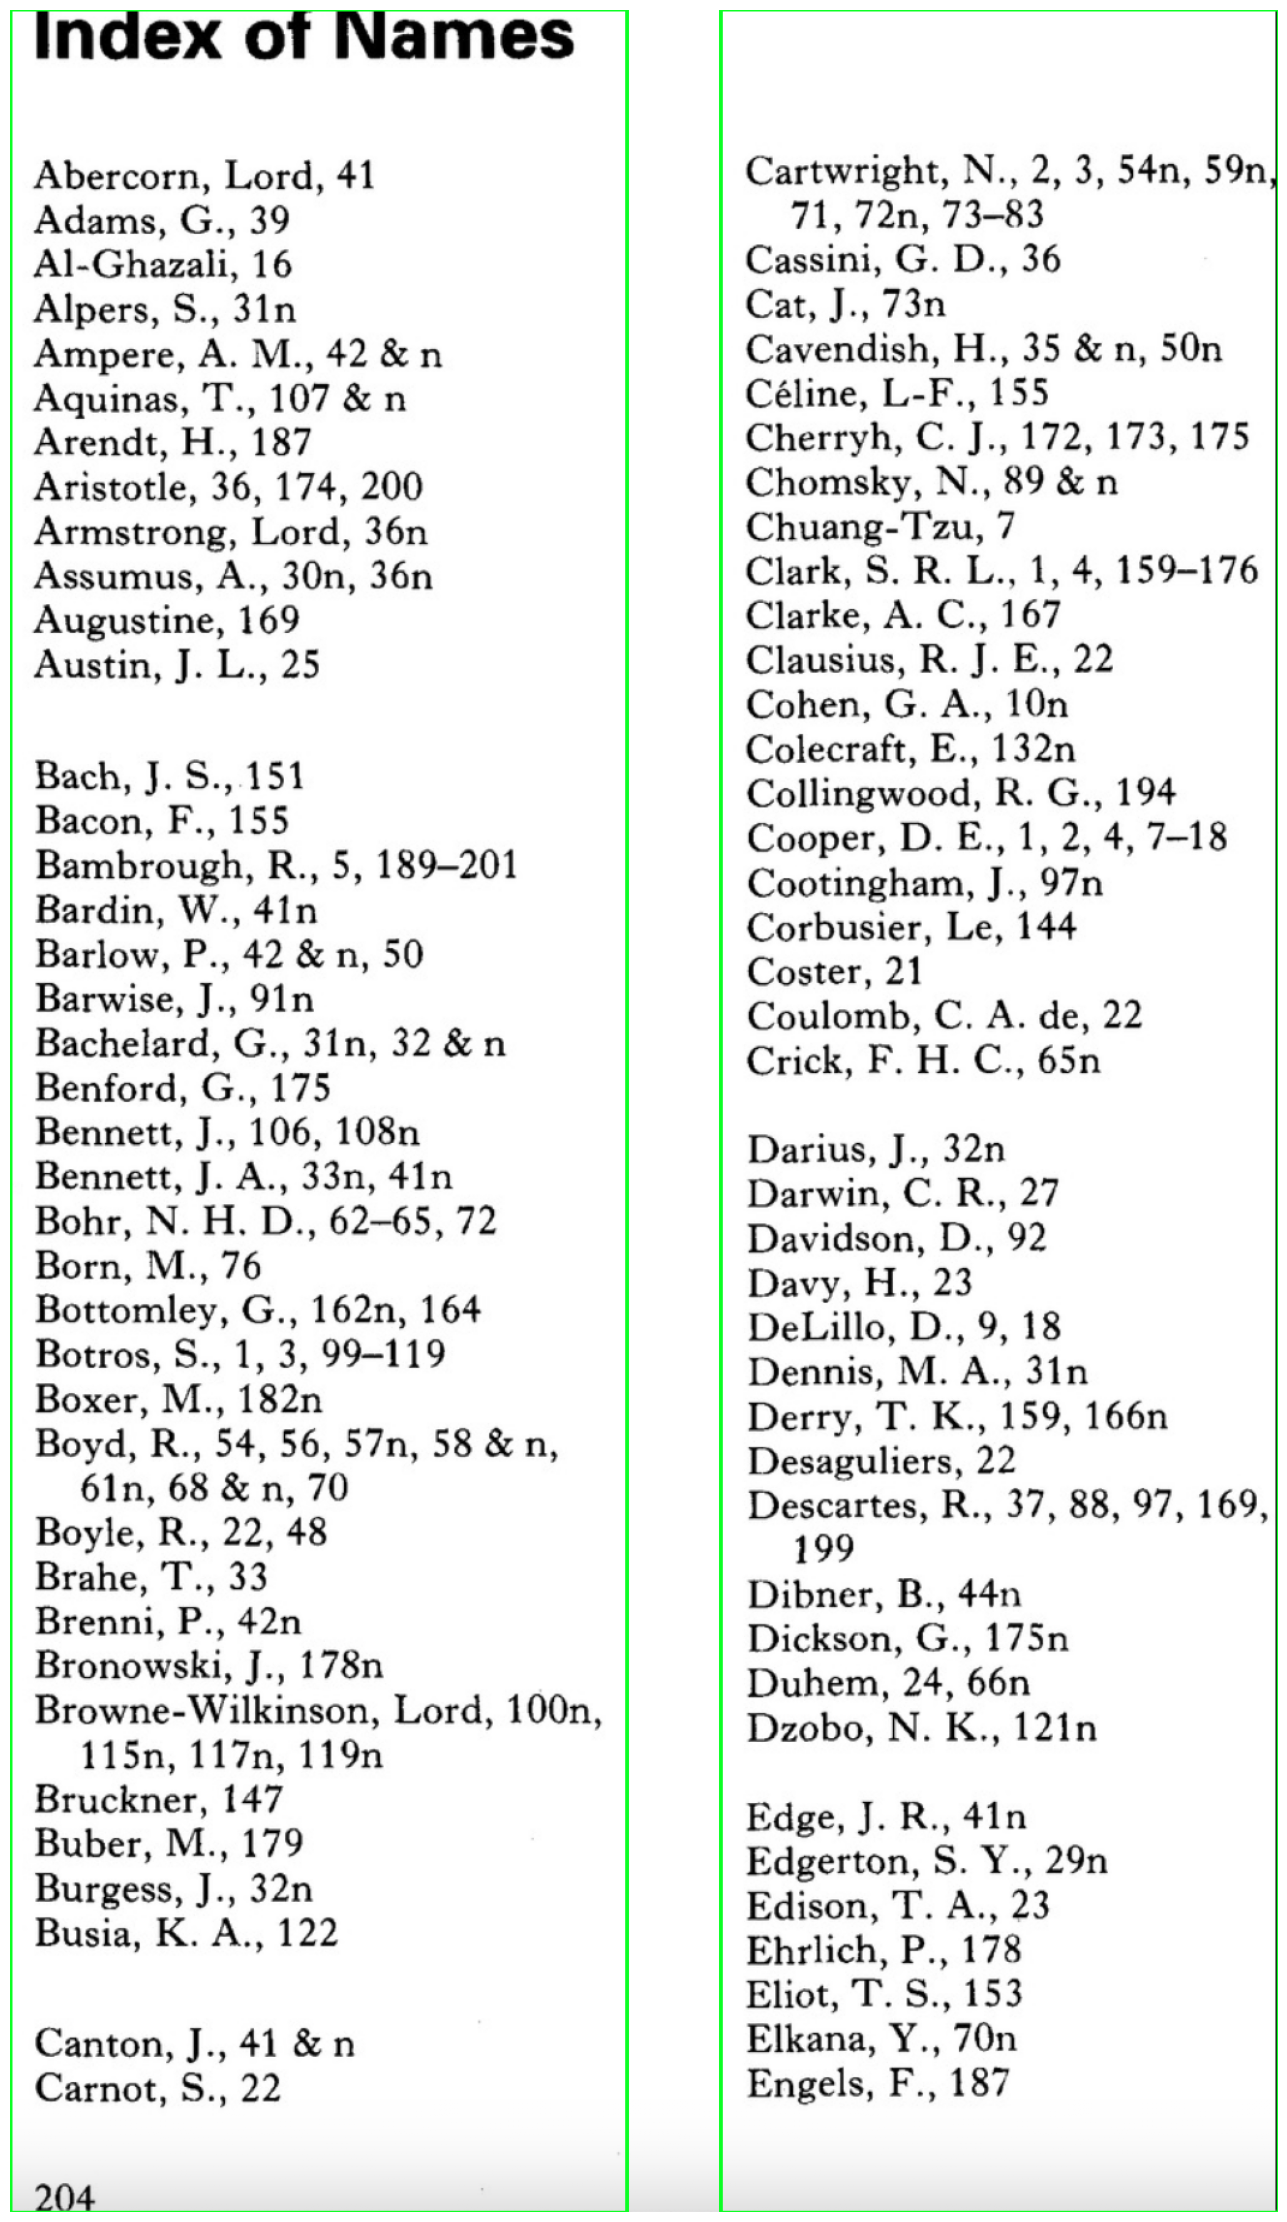

In [410]:
counter = 0
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    #we established a limit for the boxes so we get only the bigger ones
    if h > 250 and w > 90:
        roi = img[y:y+h, x:x+w]
        cv2.imwrite(f"temp/index_new_image_for_process_{counter}.png",roi)
        counter +=1
        cv2.rectangle(img, (x,y),(x+w, y+h), (36,255,12),2)
cv2.imwrite("images/index_counturs_marcked.png",img)
display("images/index_counturs_marcked.png")